**Data Scientist**: Jorge Corro

The analyses and ideas were written and thought by myself.

In [1]:

import pandas as pd
import numpy as np
# import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline


## **Starting with Step 3: Entity clustering**

In [2]:
matches_df = pd.read_excel('matches_df.xlsx')
matches_df

,Title_A,Title_B,Score
0,linksys etherfast 8-port 10100 switch - ezxs88w,linksys etherfast ezxs88w ethernet switch - ez...,0.734326
1,linksys etherfast 8-port 10100 switch - ezxs88w,linksys etherfast ezxs55w ethernet switch,0.468199
2,linksys etherfast 8-port 10100 switch - ezxs88w,linksys etherfast ef4116 ethernet switch,0.468199
3,linksys etherfast 8-port 10100 switch - ezxs88w,linksys etherfast ef4124 ethernet switch,0.468199
4,linksys etherfast10100 5-port auto-sensing swi...,linksys etherfast ezxs55w ethernet switch,0.450570
...,...,...,...
2030,sony vaio fw series black notebook computer - ...,sony vaio fw378jb notebook - vgnfw378jb,0.576823
2031,sennheiser orange silver ear headphones - cx380,sennheiser cx380 sennheiser cx 380 sport ii gr...,0.406296
2032,apple iwork 09 software individual pack mac - ...,iwork 09 retail-int dvd - mb942za,0.489768
2033,apple iwork 09 software family pack mac - mb943za,iwork 09 family pack-int dvd - mb943za,0.722761


Applying the Dbscan methods to title's

In [3]:

# Merge Title_A and Title_B into a single list of unique titles
all_titles = pd.concat([matches_df['Title_A'], matches_df['Title_B']]).unique()

# Vectorize the titles using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(all_titles)

# Apply DBSCAN clustering
# The epsilon parameter (eps) needs to be tuned based on the data
# min_samples can be set as per the minimum cluster size requirement
dbscan = DBSCAN(eps=0.5, min_samples=2, metric="cosine")
clusters = dbscan.fit_predict(X)

# Number of clusters formed
num_clusters = len(np.unique(clusters))

In [4]:
# Creating a DataFrame from the clustered titles
clustered_titles_df = pd.DataFrame({
    'Title': all_titles,
    'Cluster ID': clusters
})

# Display the DataFrame
clustered_titles_df

,Title,Cluster ID
0,linksys etherfast 8-port 10100 switch - ezxs88w,0
1,linksys etherfast10100 5-port auto-sensing swi...,-1
2,netgear prosafe 5 port 10100 desktop switch - ...,1
3,belkin f3h982-10 pro series high integrity 10 ...,2
4,netgear prosafe 16 port 10100 rackmount switch...,1
...,...,...
1654,sony vaio fw378jb notebook - vgnfw378jb,276
1655,sennheiser cx380 sennheiser cx 380 sport ii gr...,-1
1656,iwork 09 retail-int dvd - mb942za,318
1657,iwork 09 family pack-int dvd - mb943za,318


In [5]:
print(f'We obtained {num_clusters} clusters')

We obtained 330 clusters


**2D PCA Visualization**

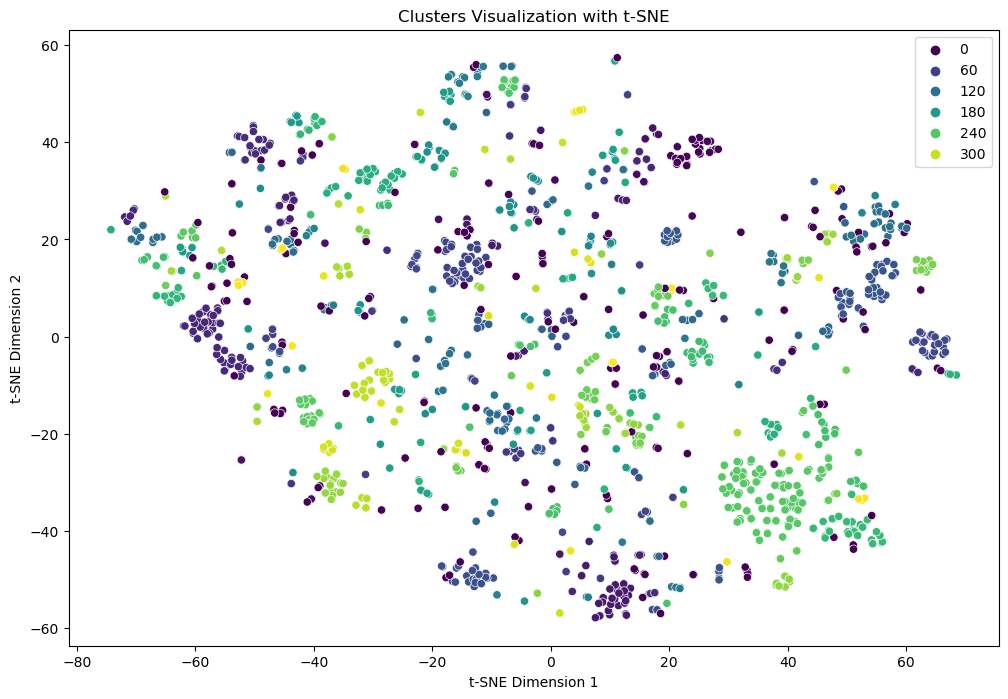

In [6]:

# Apply t-SNE to reduce dimensions - adjust n_components, perplexity and n_iter as needed
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=0)
X_tsne = tsne.fit_transform(X.toarray())

# Create a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(X_tsne, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Cluster ID'] = clusters


plt.figure(figsize=(12, 8))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster ID', data=tsne_df, palette='viridis')
plt.title('Clusters Visualization with t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()



**3D PCA Visualization**

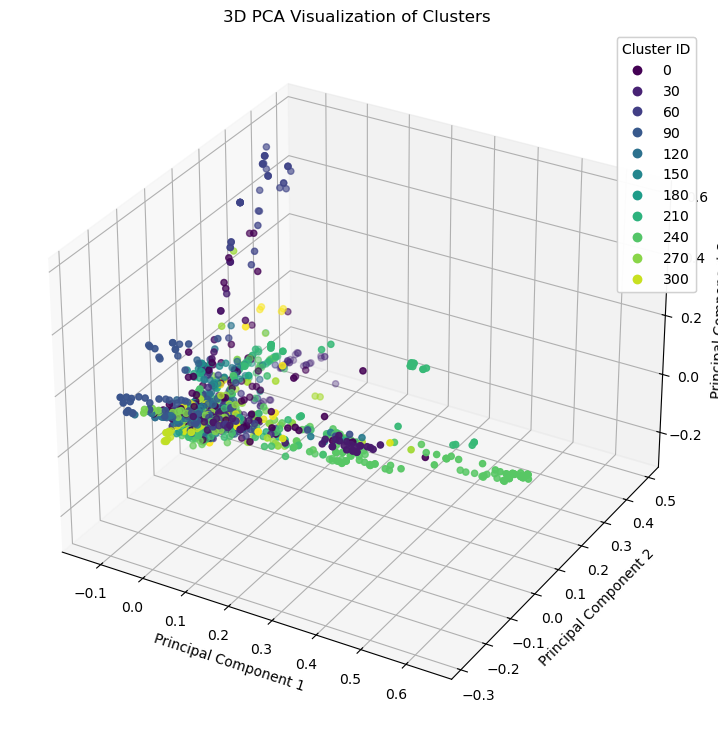

In [7]:

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X.toarray())

pca_3d_df = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
pca_3d_df['Cluster ID'] = clusters


fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_3d_df['PC1'], pca_3d_df['PC2'], pca_3d_df['PC3'], c=pca_3d_df['Cluster ID'], cmap='viridis')

legend = ax.legend(*scatter.legend_elements(), title="Cluster ID")
ax.add_artist(legend)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Visualization of Clusters')

plt.show()


Let's visualize the clusters

In [8]:

mask = (clustered_titles_df['Cluster ID'] > -1) & (clustered_titles_df['Cluster ID'] < 70)
retailer = clustered_titles_df[mask].sort_values(by='Cluster ID')
retailer_http = retailer.style.set_properties(**{'text-align': 'left'})
retailer_http


,Title,Cluster ID
0,linksys etherfast 8-port 10100 switch - ezxs88w,0
857,linksys etherfast ezxs55w ethernet switch,0
858,linksys etherfast ef4116 ethernet switch,0
859,linksys etherfast ef4124 ethernet switch,0
856,linksys etherfast ezxs88w ethernet switch - ezxs88w,0
8,linksys etherfast4116 16-port 10100 ethernet switch - ef4116,0
9,linksys etherfast 4124 24-port ethernet switch - ef4124,0
72,netgear prosafe 24-port gigabit rackmount switch 2 sfp slots - jgs524f,1
863,netgear prosafe jgs524f 24-port gigabit ethernet switch - jgs524fna,1
862,netgear prosafe fs726tp 24 port 10100 smart switch - fs726tpna,1
